# 1. Import Data

In [193]:
import pandas as pd
import numpy as np
import warnings
import datetime
warnings.filterwarnings('ignore')

In [194]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 2. EDA

## Data Cleaning

### - Check For Null Values

In [195]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values.

### - Check and convert Data Type if Required

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [197]:
data['dteday'].describe()

count            730
unique           730
top       01-01-2018
freq               1
Name: dteday, dtype: object

- Convert dteday to date time

In [198]:
data['dteday'] = data['dteday'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [199]:
data['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

- Convert weekday to categorical

In [200]:
data.weekday = data.weekday.map({6: 'Sunday', 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday'})
data.weekday = data.weekday.astype('category')
data.weekday.head()

0       Sunday
1       Monday
2      Tuesday
3    Wednesday
4     Thursday
Name: weekday, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [201]:
data.season.unique()

array([1, 2, 3, 4], dtype=int64)

- Convert season to categorical

In [202]:
data.season = data.season.map({1: 'spring', 2: 'summer', 3: 'autumn', 4: 'winter'})
data.season = data.season.astype('category')
data.season.value_counts()

season
autumn    188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [203]:
data.workingday.unique()

array([0, 1], dtype=int64)

In [204]:
data.holiday.unique()

array([0, 1], dtype=int64)

In [205]:
data.weathersit.unique()

array([2, 1, 3], dtype=int64)

In [206]:
data.weathersit = data.weathersit.map({1: 'clear', 2: 'misty', 3: 'rainy'})
data.weathersit = data.weathersit.astype('category')
data.weathersit.head()

0    misty
1    misty
2    clear
3    clear
4    clear
Name: weathersit, dtype: category
Categories (3, object): ['clear', 'misty', 'rainy']

### - Drop Non Feature Columns 

In [207]:
data.drop(['casual','registered','instant'], axis=1, inplace=True)
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,0,1,0,Sunday,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,spring,0,1,0,Monday,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,spring,0,1,0,Tuesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,spring,0,1,0,Wednesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,spring,0,1,0,Thursday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [208]:
data.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,dteday,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018-12-31 12:00:00,0.500000,6.526027,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
min,2018-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2018-07-02 06:00:00,0.000000,4.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,2018-12-31 12:00:00,0.500000,7.000000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,2019-07-01 18:00:00,1.000000,10.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
90%,2019-10-19 02:24:00,1.000000,11.000000,0.000000,1.000000,29.998347,33.908210,81.762500,19.833997,7293.800000
95%,2019-11-24 13:12:00,1.000000,12.000000,0.000000,1.000000,31.520460,35.749975,86.868735,22.999988,7576.400000
99%,2019-12-23 17:02:24,1.000000,12.000000,1.000000,1.000000,33.868050,38.941650,92.795857,27.380948,8163.810000
max,2019-12-31 00:00:00,1.000000,12.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


No outliers can be seen except for holiday

## 3. Derived Metrics

- As the date column is already partially represented by yr and mnth . We add day as another column and remove dteday altogether

In [209]:
data['day']= data['dteday'].dt.day
data.drop('dteday', axis=1, inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,0,1,0,Sunday,0,misty,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,1,0,Monday,0,misty,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,0,1,0,Tuesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,0,1,0,Wednesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,0,1,0,Thursday,1,clear,9.305237,11.46350,43.6957,12.522300,1600,5


- Rename yr to yr_2019

In [210]:
data.rename(columns={'yr': 'yr_2019'}, inplace=True)
data.head()

,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,0,1,0,Sunday,0,misty,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,1,0,Monday,0,misty,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,0,1,0,Tuesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,0,1,0,Wednesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,0,1,0,Thursday,1,clear,9.305237,11.46350,43.6957,12.522300,1600,5


## 4. Univariate Analysis

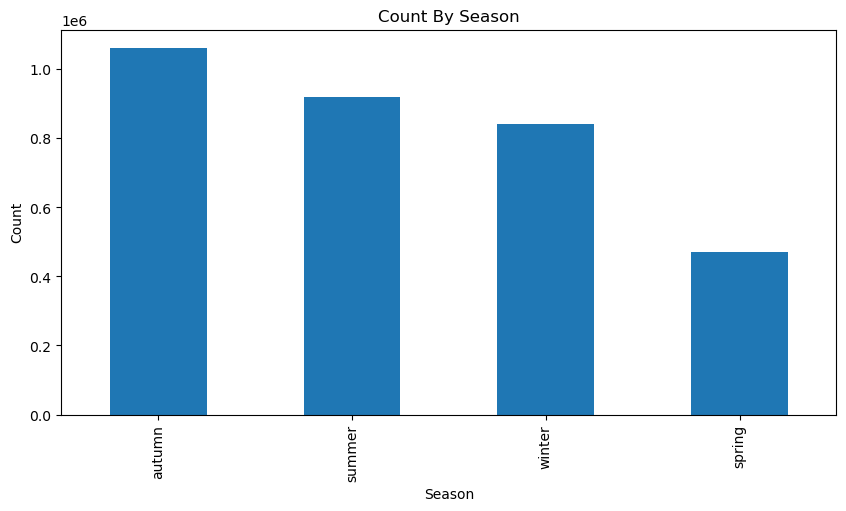

In [211]:
import matplotlib.pyplot as plt
sum = data['cnt'].groupby(data['season']).sum().sort_values(ascending=False)
sum.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count By Season')
plt.show()

We can conslude that the most bike rentals happens in Autumn and the least in Spring

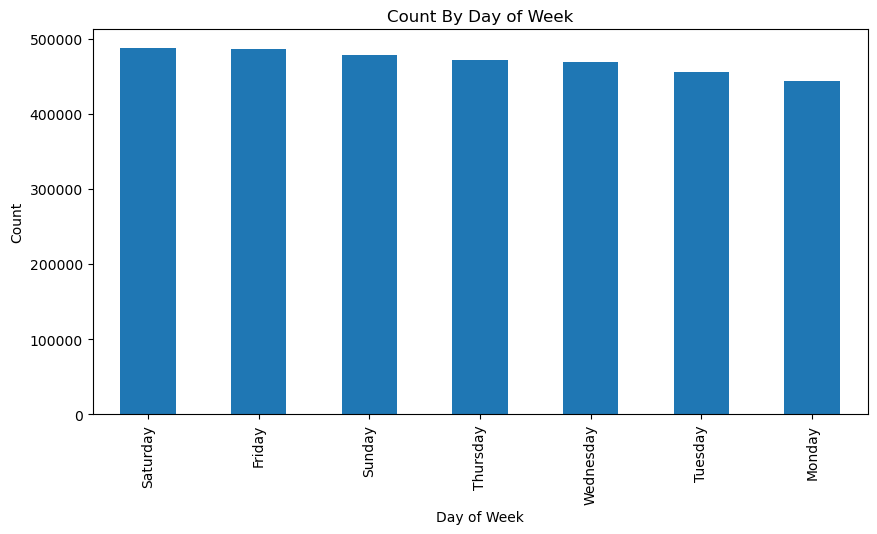

In [212]:
import matplotlib.pyplot as plt
sum = data['cnt'].groupby(data['weekday']).sum().sort_values(ascending=False)
sum.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Count By Day of Week')
plt.show()

The Total Count does not vary much with the day of week.

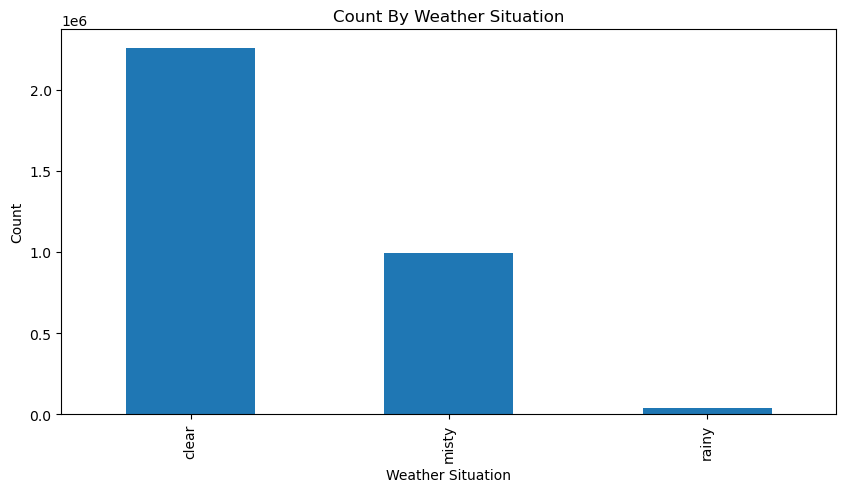

In [213]:
sum = data['cnt'].groupby(data['weathersit']).sum().sort_values(ascending=False)
sum.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.title('Count By Weather Situation')
plt.show()

We can conclude that the Count is the highest when the weather is Clear i.e. Clear, Few clouds, Partly cloudy, Partly cloudy and neglegible when the day is rainy i.e. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.

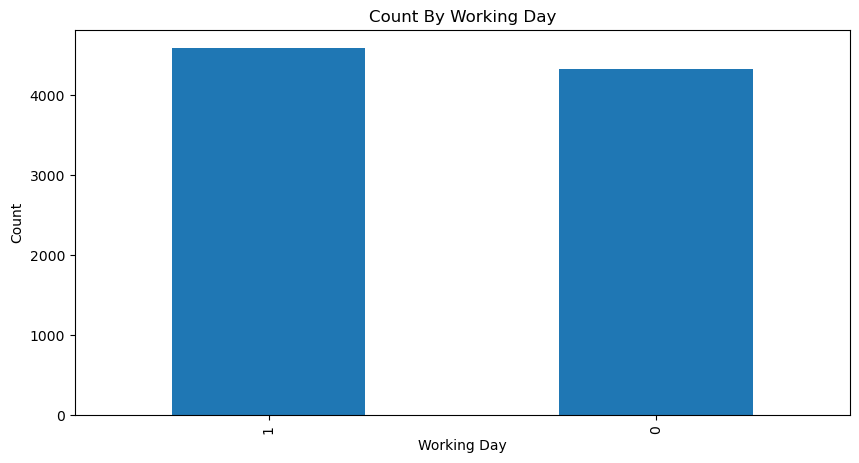

In [214]:
sum = (data['cnt'].groupby(data['workingday']).sum()/data['workingday'].value_counts()).sort_values(ascending=False)
sum.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.title('Count By Working Day')
plt.show()

Not much difference in the average value count of bike rentals on working day

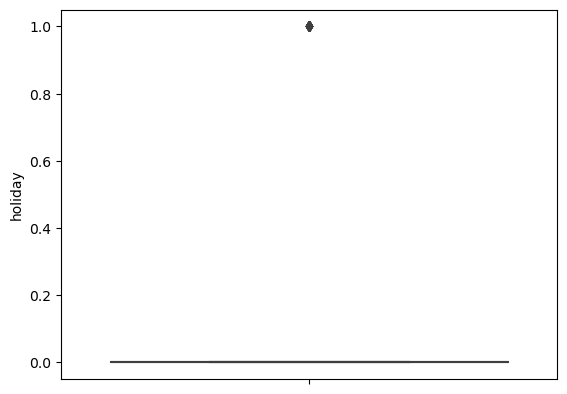

count    730.000000
mean       0.028767
std        0.167266
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: holiday, dtype: float64

In [215]:
import seaborn as sns
sns.boxplot(y="holiday", data=data)
plt.show()
data.holiday.describe()

The holiday column is mostly zero so not much can be inferred , lets check if there is an increase in bike rentals during holidays

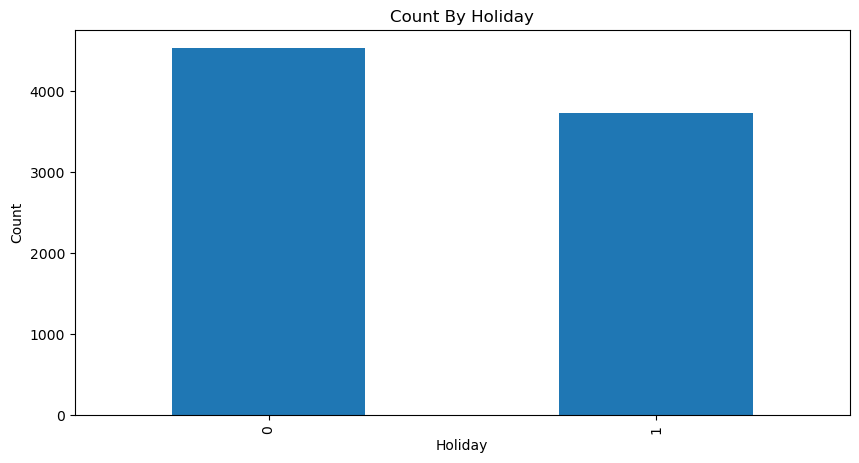

In [216]:
sum = (data['cnt'].groupby(data['holiday']).sum()/data['holiday'].value_counts()).sort_values(ascending=False)
sum.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.title('Count By Holiday')
plt.show()

There is not much difference between the avg of cnt with respect to holiday , so it should be safe to drop holiday 

In [217]:
data.drop('holiday', axis=1, inplace=True)
data.head()

,season,yr_2019,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,0,1,Sunday,0,misty,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,1,Monday,0,misty,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,0,1,Tuesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,0,1,Wednesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,0,1,Thursday,1,clear,9.305237,11.46350,43.6957,12.522300,1600,5


## 5. Bivariate Analysis

In [218]:
data.head()

,season,yr_2019,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,0,1,Sunday,0,misty,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,1,Monday,0,misty,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,0,1,Tuesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,0,1,Wednesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,0,1,Thursday,1,clear,9.305237,11.46350,43.6957,12.522300,1600,5


In [219]:
data.groupby(["mnth"])['hum'].mean()

mnth
1     58.582827
2     56.322686
3     58.847503
4     58.806312
5     68.895831
6     57.580552
7     59.787632
8     63.773010
9     71.471437
10    69.376087
11    62.487648
12    66.604052
Name: hum, dtype: float64

9th Month is the most humid and 6th the least

In [220]:
data.groupby(["mnth"])['temp'].mean()

mnth
1      9.694201
2     12.235249
3     16.012089
4     19.269952
5     24.386735
6     28.047985
7     30.974287
8     29.051844
9     25.275884
10    19.885500
11    15.138010
12    13.285270
Name: temp, dtype: float64

The mean tempetrature is least in the 1st month abd most in the 7th

In [221]:
data.groupby(["season"])['hum'].mean()

season
autumn    63.348206
spring    58.167024
summer    62.694833
winter    66.871917
Name: hum, dtype: float64

There is not much change in the humidity for different seasons

## 6. Creating Dummy Variable

In [222]:
dummies = pd.get_dummies(data[['weekday','weathersit','season']], drop_first=True, dtype=int)
dummies

,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_misty,weathersit_rainy,season_spring,season_summer,season_winter
0,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,1,0,1,0,0
726,0,1,0,0,0,0,1,0,1,0,0
727,0,0,1,0,0,0,1,0,1,0,0
728,1,0,0,0,0,0,0,0,1,0,0


In [223]:
data = pd.concat([data, dummies], axis=1)
data.head()

,season,yr_2019,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_misty,weathersit_rainy,season_spring,season_summer,season_winter
0,spring,0,1,Sunday,0,misty,14.110847,18.18125,80.5833,10.749882,...,0,1,0,0,0,1,0,1,0,0
1,spring,0,1,Monday,0,misty,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,0,1,0,1,0,0
2,spring,0,1,Tuesday,1,clear,8.050924,9.47025,43.7273,16.636703,...,0,0,0,1,0,0,0,1,0,0
3,spring,0,1,Wednesday,1,clear,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,1,0,0,1,0,0
4,spring,0,1,Thursday,1,clear,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,1,0,0


Drop The original columns

In [224]:
data.drop(['weekday','weathersit','season'], axis=1, inplace=True)
data.head()

,yr_2019,mnth,workingday,temp,atemp,hum,windspeed,cnt,day,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_misty,weathersit_rainy,season_spring,season_summer,season_winter
0,0,1,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,0,1,0,1,0,0
1,0,1,0,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,0,0,0,1,0,1,0,0
2,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,3,0,0,0,0,1,0,0,0,1,0,0
3,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,4,0,0,0,0,0,1,0,0,1,0,0
4,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,5,0,0,0,1,0,0,0,0,1,0,0


## 7. Train Test Split

In [225]:
X = data.drop(['cnt'], axis=1)
X.head()

,yr_2019,mnth,workingday,temp,atemp,hum,windspeed,day,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_misty,weathersit_rainy,season_spring,season_summer,season_winter
0,0,1,0,14.110847,18.18125,80.5833,10.749882,1,0,0,1,0,0,0,1,0,1,0,0
1,0,1,0,14.902598,17.68695,69.6087,16.652113,2,1,0,0,0,0,0,1,0,1,0,0
2,0,1,1,8.050924,9.47025,43.7273,16.636703,3,0,0,0,0,1,0,0,0,1,0,0
3,0,1,1,8.200000,10.60610,59.0435,10.739832,4,0,0,0,0,0,1,0,0,1,0,0
4,0,1,1,9.305237,11.46350,43.6957,12.522300,5,0,0,0,1,0,0,0,0,1,0,0


In [226]:
y = data['cnt']
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [229]:
scaler = StandardScaler()
X_train[['temp','atemp','hum','windspeed','day','mnth']] = scaler.fit_transform(X_train[['temp','atemp','hum','windspeed','day','mnth']])
X_train.head()

,yr_2019,mnth,workingday,temp,atemp,hum,windspeed,day,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_misty,weathersit_rainy,season_spring,season_summer,season_winter
683,1,1.292164,1,-0.985606,-0.960523,-0.103434,-0.473324,-0.044695,0,0,0,0,0,0,1,0,0,0,1
645,1,0.999350,0,-0.647121,-0.571139,0.536841,0.022275,-0.844059,0,0,0,0,1,0,1,0,0,0,1
163,0,-0.171906,1,0.734280,0.749386,-1.007011,1.584643,-0.273084,0,0,0,0,1,0,0,0,0,1,0
360,0,1.584978,1,-0.967311,-0.941145,0.916822,0.005675,1.325644,0,0,0,0,0,1,1,0,1,0,0
640,1,0.999350,1,0.857783,0.733833,1.141219,-1.640885,-1.415033,0,0,0,1,0,0,1,0,0,0,1


In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

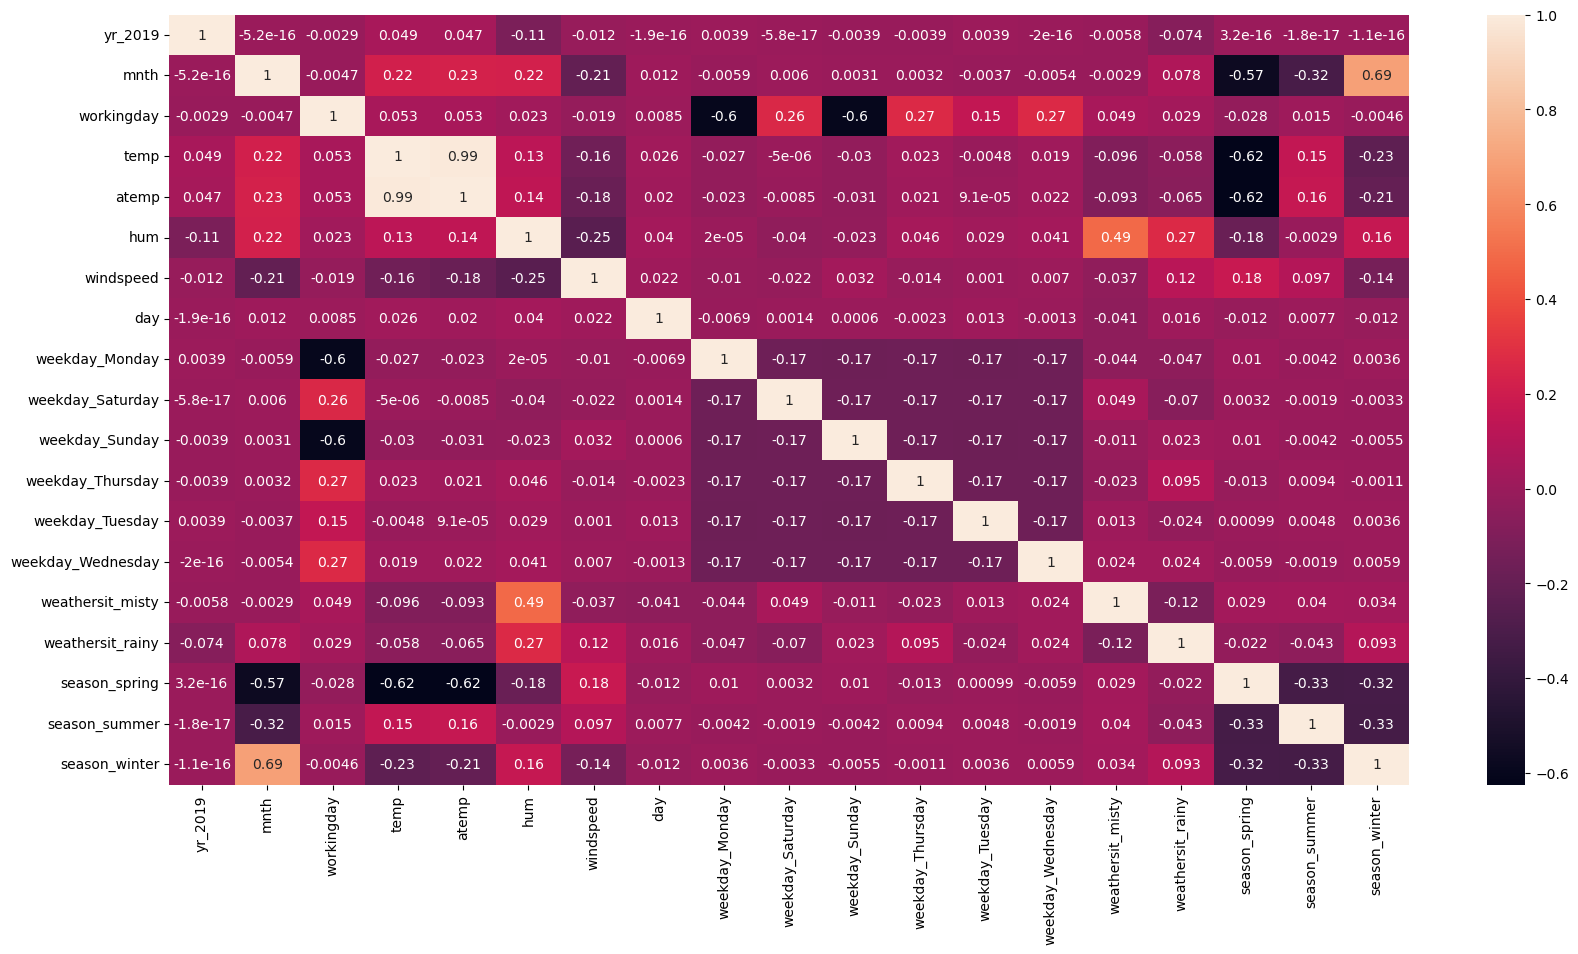

In [231]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(), annot=True)
plt.show()

-------------------------------------------

In [232]:
corr_matrix = X.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.5)]
print(to_drop)

['atemp', 'weekday_Monday', 'weekday_Sunday', 'season_spring', 'season_winter']


In [233]:
X_train = X_train.drop(to_drop, axis=1)

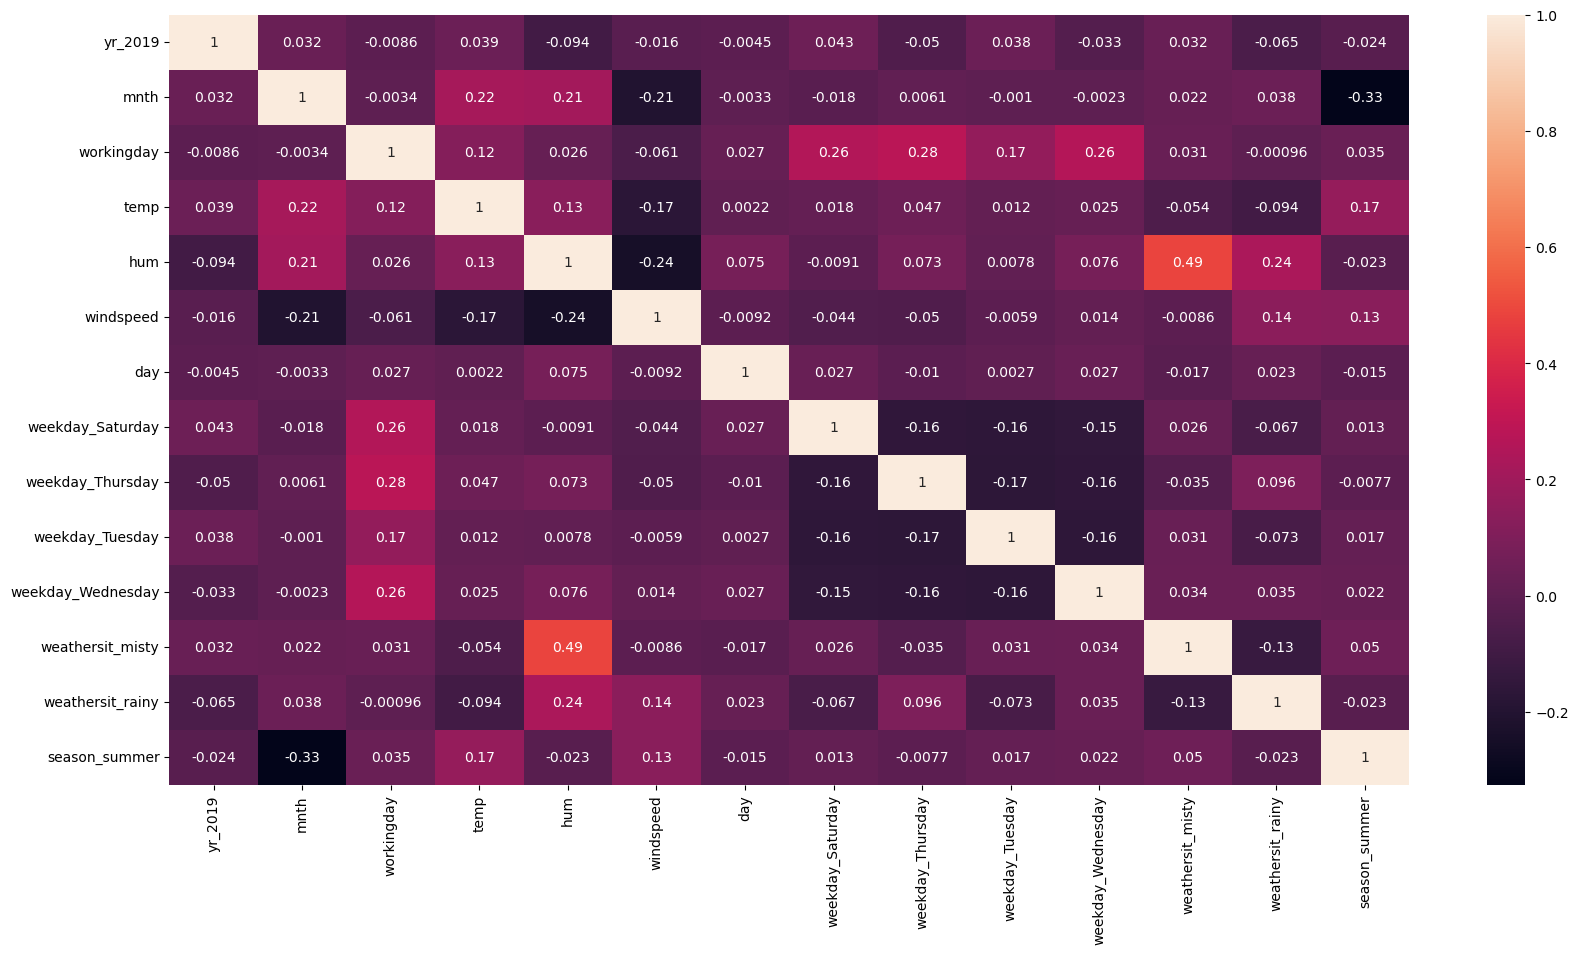

In [234]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [235]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select= 10)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr_2019', True, 1),
 ('mnth', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 2),
 ('windspeed', True, 1),
 ('day', False, 4),
 ('weekday_Saturday', False, 5),
 ('weekday_Thursday', False, 3),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', True, 1),
 ('weathersit_misty', True, 1),
 ('weathersit_rainy', True, 1),
 ('season_summer', True, 1)]

In [236]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['hum', 'day', 'weekday_Saturday', 'weekday_Thursday'], dtype='object')

In [237]:
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm  = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm ).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     176.5
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          5.93e-157
Time:                        23:54:29   Log-Likelihood:                -4206.7
No. Observations:                 511   AIC:                             8435.
Df Residuals:                     500   BIC:                             8482.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3489.6781     91.70

In [238]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,workingday,2.32
0,yr_2019,1.63
9,season_summer,1.53
7,weathersit_misty,1.46
6,weekday_Wednesday,1.30
5,weekday_Tuesday,1.27
1,mnth,1.25
3,temp,1.17
4,windspeed,1.10
8,weathersit_rainy,1.07


## Residual Analysis

Text(0.5, 0, 'Errors')

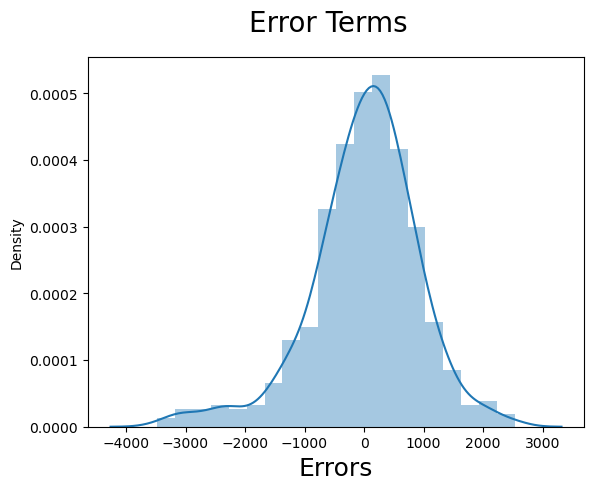

In [239]:
y_train_cnt = lm.predict(X_train_lm)
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

## Making Predictions

In [240]:
X_test[['temp','atemp','hum','windspeed','day','mnth']] = scaler.transform(X_test[['temp','atemp','hum','windspeed','day','mnth']])
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

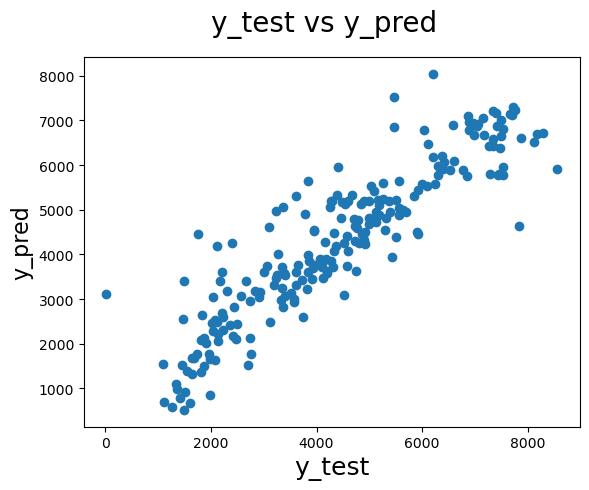

In [241]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [242]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     176.5
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          5.93e-157
Time:                        23:56:28   Log-Likelihood:                -4206.7
No. Observations:                 511   AIC:                             8435.
Df Residuals:                     500   BIC:                             8482.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3489.6781     91.70

R-squared:                       0.779
Adj. R-squared:                  0.775